In [317]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./acs2017_census_tract_data.csv')

df.head()


# # Remove any observations that have missing data
# df_preprocessed.dropna(inplace=True)
# df_preprocessed = df_preprocessed.drop('County',axis = 1)

# df_preprocessed_encoded = pd.get_dummies(df_preprocessed['State'], prefix='State')
# df_preprocessed = pd.concat([df_preprocessed, df_preprocessed_encoded], axis=1)
# df_preprocessed = df_preprocessed.drop('State', axis=1)
# # print(df_preprocessed.dtypes)
# # print(df_preprocessed.nunique())

# income_ranges = [0, 50000, 100000, float('inf')]
# income_labels = ['<50000', '50000-100000', '>100000']

# df_preprocessed['IncomeEncoded'] = pd.cut(df_preprocessed['Income'], bins=income_ranges, labels=income_labels)

# df_preprocessed_encoded = pd.get_dummies(df_preprocessed['IncomeEncoded'])
# df_preprocessed = pd.concat([df_preprocessed, df_preprocessed_encoded], axis=1)


# X_preprocessed = df_preprocessed.drop('IncomeEncoded', axis=1)  # Features
# y_preprocessed = df_preprocessed['IncomeEncoded']  # Target
# le = LabelEncoder()

# # Fit the encoder to the target variable and transform it
# y_preprocessed = le.fit_transform(y_preprocessed)
# # Split the data
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# X_train_preprocessed, X_test_preprocessed, y_train_preprocessed, y_test_preprocessed = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, random_state=42, stratify=y_preprocessed)

# # Balance the training set by quantizing the "ChildPoverty" variable into four classes
# X_train_preprocessed['ChildPoverty'] = pd.qcut(X_train_preprocessed['ChildPoverty'], q=4, labels=False)

# # Apply StandardScaler
# scaler = StandardScaler()
# X_train_preprocessed = scaler.fit_transform(X_train_preprocessed)
# X_test_preprocessed = scaler.transform(X_test_preprocessed)


# params = { 'n_hidden':30, 
#          'C':0.1, 'epochs':20, 'eta':0.001, 
#          'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
#          'shuffle':True,'random_state':1}

# # nn = TLPBetterInitial(**params)

# # nn.fit(X_train_preprocessed, y_train_preprocessed, print_progress=50)
# # yhat_preprocessed = nn.predict(X_test_preprocessed)
# # print('Accuracy:',accuracy_score(y_test_preprocessed,yhat_preprocessed))

# nn = TLPBetterInitial(**params)
# nn.fit(X_train_preprocessed, y_train_preprocessed, print_progress=1, XY_test=(X_test_preprocessed, y_test_preprocessed))
# yhat = nn.predict(X_test_preprocessed)
# print('Accuracy:',accuracy_score(y_test_preprocessed,yhat))


# plt.plot(range(len(nn.cost_)), nn.cost_)
# plt.ylabel('Cost')
# plt.xlabel('Epochs')
# plt.tight_layout()
# plt.show()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [318]:
# part two 
print(df.shape)
df.dropna(inplace=True)
df.shape
#not too many missing

(74001, 37)


(72718, 37)

In [319]:
df.dtypes

TractId               int64
State                object
County               object
TotalPop              int64
Men                   int64
Women                 int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
VotingAgeCitizen      int64
Income              float64
IncomeErr           float64
IncomePerCap        float64
IncomePerCapErr     float64
Poverty             float64
ChildPoverty        float64
Professional        float64
Service             float64
Office              float64
Construction        float64
Production          float64
Drive               float64
Carpool             float64
Transit             float64
Walk                float64
OtherTransp         float64
WorkAtHome          float64
MeanCommute         float64
Employed              int64
PrivateWork         float64
PublicWork          float64
SelfEmployed        float64
FamilyWork          

In [320]:
print(len(df.State.unique()))
print(len(df.County.unique()))

52
1954


__TODO__ add explanation for why we drop county instead of state

In [321]:
df.drop('County',axis=1,inplace=True)

In [322]:
df.dtypes

TractId               int64
State                object
TotalPop              int64
Men                   int64
Women                 int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
VotingAgeCitizen      int64
Income              float64
IncomeErr           float64
IncomePerCap        float64
IncomePerCapErr     float64
Poverty             float64
ChildPoverty        float64
Professional        float64
Service             float64
Office              float64
Construction        float64
Production          float64
Drive               float64
Carpool             float64
Transit             float64
Walk                float64
OtherTransp         float64
WorkAtHome          float64
MeanCommute         float64
Employed              int64
PrivateWork         float64
PublicWork          float64
SelfEmployed        float64
FamilyWork          float64
Unemployment        

In [323]:
# lets encode them
initial_list = df.State.unique()
codes = {initial_list[i]: i for i in range(len(initial_list))}

df = df.replace(codes)

In [324]:
print('there are',len(df["ChildPoverty"].unique()), 'different ChildPoverty values')
print('we will want',int(len(df)/4), 'ish instances in each class to create somewhat equal quartiles')
def categorise(row):  
    if row['ChildPoverty'] > 0 and row['ChildPoverty'] <= 8:
        return 'fourth_quartile'
    elif row['ChildPoverty'] > 8 and row['ChildPoverty'] <= 19:
        return 'third_quartile'
    elif row['ChildPoverty'] > 19  and row['ChildPoverty'] <= 37:
        return 'second_quartile'
    return 'first_quartile'

df['poverty_quartile'] = df.apply(lambda row: categorise(row), axis=1)

print(df['poverty_quartile'].value_counts())

there are 954 different ChildPoverty values
we will want 18179 ish instances in each class to create somewhat equal quartiles
poverty_quartile
first_quartile     18699
second_quartile    18583
third_quartile     18306
fourth_quartile    17130
Name: count, dtype: int64


In [325]:
y = df['poverty_quartile']
#one hot encode the poverty quartile
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['poverty_quartile', 'ChildPoverty']), y, test_size=0.20, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58174, 35)
(58174, 4)
(14544, 35)
(14544, 4)


# Pre-processing and Initial Modeling (2.5 points total)

In [326]:
# #Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# #Original Author: Sebastian Raschka

# import numpy as np
# from scipy.special import expit
# import sys
# import pandas as pd

# # start with a simple base classifier, which can't be fit or predicted
# # it only has internal classes to be used by classes that will subclass it
# # Start with the following functions:
# #    init
# #    encode_labels
# #    initialize weights
# #    sigmoid
# #    add bias (vector of ones)
# #    objective function (cost and regularizer)
# class TwoLayerPerceptronBase(object):
#     def __init__(self, n_hidden=30,
#                  C=0.0, epochs=500, eta=0.001, random_state=None):
#         np.random.seed(random_state)
        
#         self.n_hidden = n_hidden
#         self.l2_C = C
#         self.epochs = epochs
#         self.eta = eta
        
#     @staticmethod
#     def _encode_labels(y):
#         """Encode labels into one-hot representation"""
#         onehot = pd.get_dummies(y).values.T
            
#         return onehot

#     def _initialize_weights(self):
#         """Initialize weights with small random numbers."""
#         W1_num_elems = (self.n_features_)*self.n_hidden
#         W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
#         W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
#         b1 = np.zeros((self.n_hidden, 1))
        
#         W2_num_elems = (self.n_hidden)*self.n_output_
#         W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
#         W2 = W2.reshape(self.n_output_, self.n_hidden)
#         b2 = np.zeros((self.n_output_, 1))
        
#         return W1, W2, b1, b2
    
#     @staticmethod
#     def _sigmoid(z):
#         """Use scipy.special.expit to avoid overflow"""
#         # 1.0 / (1.0 + np.exp(-z))
#         return expit(z)
    
    
#     @staticmethod
#     def _L2_reg(lambda_, W1, W2):
#         """Compute L2-regularization cost"""
#         # only compute for non-bias terms
#         return (lambda_) * np.sqrt(np.mean(W1 ** 2) + np.mean(W2 ** 2))
    
#     def _cost(self,A3,Y_enc,W1,W2):
#         '''Get the objective function value'''
#         cost = np.mean((Y_enc-A3)**2)
#         L2_term = self._L2_reg(self.l2_C, W1, W2)
#         return cost + L2_term
# # now let's add in the following functions:
# #    feedforward
# #    fit and predict
# class TwoLayerPerceptron(TwoLayerPerceptronBase):
#     def _feedforward(self, X, W1, W2, b1, b2):
#         """Compute feedforward step
#         -----------
#         X : Input layer with original features.
#         W1: Weight matrix for input layer -> hidden layer.
#         W2: Weight matrix for hidden layer -> output layer.
#         ----------
#         a1-a3 : activations into layer (or output layer)
#         z1-z2 : layer inputs 

#         """
#         A1 = X.T
#         Z1 = W1 @ A1 + b1
#         A2 = self._sigmoid(Z1)
#         Z2 = W2 @ A2 + b2
#         A3 = self._sigmoid(Z2)
#         return A1, Z1, A2, Z2, A3
    
#     def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
#         """ Compute gradient step using backpropagation.
#         """
#         # need to vectorize this computation!
#         # See additional code and derivation below!
#         pass
    
#     def predict(self, X):
#         """Predict class labels"""
#         _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
#         y_pred = np.argmax(A3, axis=0)
#         return y_pred
    
    
#     def fit(self, X, y, print_progress=False):
#         """ Learn weights from training data."""
        
#         X_data, y_data = X.copy(), y.copy()
#         Y_enc = self._encode_labels(y)
        
#         # init weights and setup matrices
#         self.n_features_ = X_data.shape[1]
#         self.n_output_ = Y_enc.shape[0]
#         self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

#         self.cost_ = []
#         for i in range(self.epochs):

#             if print_progress>0 and (i+1)%print_progress==0:
#                 sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
#                 sys.stderr.flush()

#             # feedforward all instances
#             A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2, self.b1, self.b2)
            
#             cost = self._cost(A3,Y_enc,self.W1,self.W2)
#             self.cost_.append(cost)

#             # compute gradient via backpropagation
#             gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
#                                               W1=self.W1, W2=self.W2)

#             self.W1 -= self.eta * gradW1
#             self.W2 -= self.eta * gradW2
#             self.b1 -= self.eta * gradb1
#             self.b2 -= self.eta * gradb2
            

#         return self
# class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
#     # just need a different gradient calculation
#     def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
#         """ Compute gradient step using backpropagation.
#         """
#         # vectorized backpropagation
#         V2 = -2*(Y_enc-A3)*A3*(1-A3)
#         V1 = A2*(1-A2)*(W2.T @ V2)
        
#         gradW2 = V2 @ A2.T
#         gradW1 = V1 @ A1.T
        
#         gradb2 = np.sum(V2, axis=1).reshape((-1,1))
#         gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
#         # regularize weights that are not bias terms
#         gradW1 += W1 * self.l2_C * 2
#         gradW2 += W2 * self.l2_C * 2 

#         return gradW1, gradW2, gradb1, gradb2
# # Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# # Original Author: Sebastian Raschka
# # This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# # please note, however, that this code has been manipulated to reflect our assumptions and notation.
# class TLPVectorizedMiniBatch(TwoLayerPerceptronVectorized):
#     def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, **kwds):        
#         # but keep other keywords
#         super().__init__(**kwds)
        
#         # need to add to the original initializer 
#         self.alpha = alpha
#         self.decrease_const = decrease_const
#         self.shuffle = shuffle
#         self.minibatches = minibatches
        
        
#     def fit(self, X, y, print_progress=0):
#         """ Learn weights from training data."""
#         X_data, y_data = X.copy(), y.copy()
#         Y_enc = self._encode_labels(y)
        
#         # init weights and setup matrices
#         self.n_features_ = X_data.shape[1]
#         self.n_output_ = Y_enc.shape[0]
#         self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()
        
#         # start momentum at zero for previous updates
#         rho_W1_prev = np.zeros(self.W1.shape) # for momentum
#         rho_W2_prev = np.zeros(self.W2.shape) # for momentum

#         self.cost_ = []
        
#         # outer loop: go through all data one time (epochs)
#         for k in range(self.epochs):

#             # adaptive learning rate
#             eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
#             eta = max(eta,self.eta/1000)
#             # there are many forms of adaptive learning rates out there!

#             if print_progress>0 and (k+1)%print_progress==0:
#                 sys.stderr.write('\rEpoch: %d/%d' % (k+1, self.epochs))
#                 sys.stderr.flush()

#             if self.shuffle:
#                 # shuffle the data so batches ar different
#                 ridx = np.random.permutation(y_data.shape[0])
#                 X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

#             # use numpy split to split into equal sized batches 
#             # num batches == self.minibatches
#             mini = np.array_split(range(y_data.shape[0]), self.minibatches)
#             mini_cost = []
#             # inner loop: go through all mini-batches of data
#             for idx in mini: # iterate through each batch

#                 # feedforward
#                 A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
#                                                        self.W1,
#                                                        self.W2,
#                                                        self.b1,
#                                                        self.b2
#                                                       )
                
#                 cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
#                 mini_cost.append(cost) # this appends cost of mini-batch only

#                 # compute gradient via backpropagation
#                 gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
#                                                   Y_enc=Y_enc[:, idx],
#                                                   W1=self.W1, W2=self.W2)

#                 # now use simple momentum to update values
#                 rho_W1, rho_W2 = eta * gradW1, eta * gradW2 
#                 self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
#                 self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
#                 rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                
#                 self.b1 -= eta * gradb1 
#                 self.b2 -= eta * gradb2 

#             self.cost_.append(mini_cost)
            
#         return self
    
# class TLPVectorizedMiniBatchCrossEntropyGlorot(TLPVectorizedMiniBatch):
#     """Uses Initialize Weights"""
    

#     def _initialize_weights(self):
        
#         """Initialize weights Glorot and He normalization."""
#         init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
#         W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

#         # reduce the final layer magnitude in order to balance the size of the gradients
#         # between 
#         init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
#         W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
#         # set these to zero to start so that
#         # they do not immediately saturate the neurons
#         b1 = np.zeros((self.n_hidden, 1))
#         b2 = np.zeros((self.n_output_, 1))
        
#         return W1, W2, b1, b2
    
    
#     """Cost function that uses cross entropy"""
#     def _cost(self,A3,Y_enc,W1,W2):
#         '''Get the objective function value'''
#         cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3+1e-7)+(1-Y_enc)*np.log(1-A3+1e-7))))
#         L2_term = self._L2_reg(self.l2_C, W1, W2)
#         return cost + L2_term


In [327]:
#Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
#Original Author: Sebastian Raschka

import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
# Start with the following functions:
#    init
#    encode_labels
#    initialize weights
#    sigmoid
#    add bias (vector of ones)
#    objective function (cost and regularizer)
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
# now let's add in the following functions:
#    feedforward
#    fit and predict
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
        # See additional code and derivation below!
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            

        return self
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka
# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
class TLPVectorizedMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
        
        
        # but keep other keywords
        super().__init__(**kwds)
    # def fit(self, X, y, print_progress=False):
    #     """ Learn weights from training data."""

    #     X_data, y_data = X.copy(), y.copy()
    #     Y_enc = self._encode_labels(y)

    #     # init weights and setup matrices
    #     self.n_features_ = X_data.shape[1]
    #     self.n_output_ = Y_enc.shape[0]
    #     self.W1, self.W2 = self._initialize_weights()
        
    #     self.minibatch_size = X_data.shape[0] // self.minibatches


    #     self.cost_ = []
    #     for i in range(self.epochs):

    #         if print_progress>0 and (i+1)%print_progress==0:
    #             sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
    #             sys.stderr.flush()

    #         # Mini-batch generation
    #         indices = np.arange(X_data.shape[0])
    #         np.random.shuffle(indices)
    #         for start_idx in range(0, X_data.shape[0] - self.minibatch_size + 1, self.minibatch_size):
    #             batch_idx = indices[start_idx:start_idx + self.minibatch_size]

    #             # feedforward all instances in the mini-batch
    #             A1, Z1, A2, Z2, A3 = self._feedforward(X_data[batch_idx],self.W1,self.W2)

    #             cost = self._cost(A3,Y_enc[:, batch_idx],self.W1,self.W2)
    #             self.cost_.append(cost)

    #             # compute gradient via backpropagation
    #             grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc[:, batch_idx],
    #                                             W1=self.W1, W2=self.W2)

    #             self.W1 -= self.eta * grad1
    #             self.W2 -= self.eta * grad2

    #     return self
    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X_data, y_data = X.copy().values, y.copy()
        else:
            X_data, y_data = X.copy(), y.copy()

        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()
        
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta,self.eta/1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress>0 and (k+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (k+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            # use numpy split to split into equal sized batches 
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2)

                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(mini_cost)
            
        return self



class TLPVectorizedMiniBatchCrossEntropyGlorot(TLPVectorizedMiniBatch):
    """Uses Initialize Weights"""
    

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1)) 
        W2[:,:1] = 0
        
        return W1, W2
    
    
    """Cost function that uses cross entropy"""
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        # cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        # L2_term = self._L2_reg(self.l2_C, W1, W2)
        
        eps = 1e-7
        A3 = np.clip(A3, eps, 1 - eps)
        cost = -np.mean(Y_enc * np.log(A3 + eps) + (1 - Y_enc) * np.log(1 - A3 + eps))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    

In [328]:
# Function to convert data into format to test accuracy with
def convert_data(y_pred):
  returnMe = pd.DataFrame()
  
  returnMe['first_quartile'] = (y_pred == 0)
  returnMe['second_quartile'] = (y_pred == 1)
  returnMe['third_quartile'] = (y_pred == 2)
  returnMe['fourth_quartile'] = (y_pred == 3)

  return returnMe

Epoch: 1/10

Epoch: 10/10

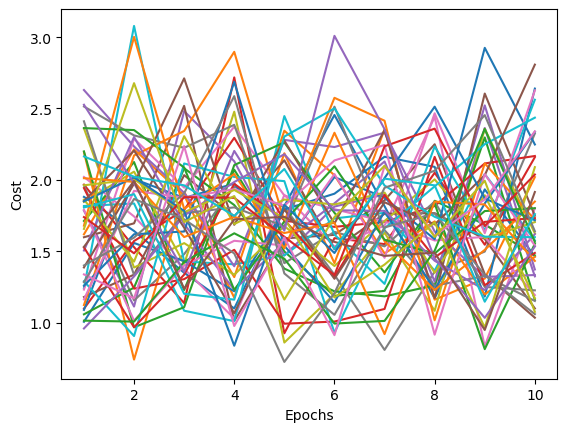

Accuracy: 0.25412541254125415


In [329]:
# train the model
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

params = { 'n_hidden':30, 
         'C':0.1, 'epochs':10, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = TLPVectorizedMiniBatchCrossEntropyGlorot(n_hidden=30, C=0.0, epochs=50, eta=0.001, random_state=42)
model = TLPVectorizedMiniBatchCrossEntropyGlorot(**params)
model.fit(X_train, y_train, print_progress=True)
# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

# Get accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch: 1/10

Epoch: 10/10

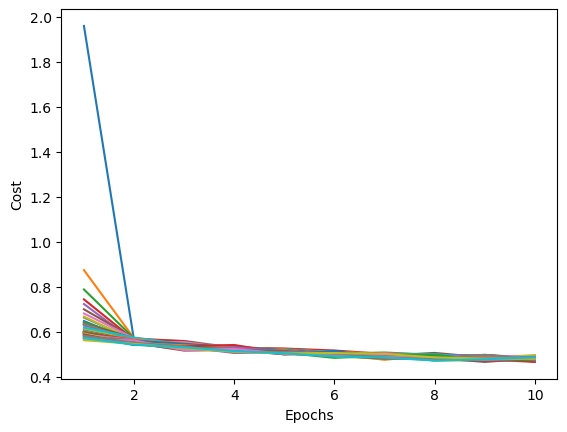

Accuracy: 0.6585533553355336


In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# define the TwoLayerPerceptron and TwoLayerPerceptronBase classes here

class NormalizedTwoLayerPerceptron(TLPVectorizedMiniBatchCrossEntropyGlorot):
    def fit(self, X, y, print_progress=False):
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        super().fit(X_norm, y, print_progress=print_progress)
        self.scaler_ = scaler
        
    def predict(self, X):
        X_norm = self.scaler_.transform(X)
        return super().predict(X_norm)

# train the model
params = { 'n_hidden':30, 
         'C':0.1, 'epochs':10, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = NormalizedTwoLayerPerceptron(n_hidden=30, C=0.0, epochs=500, eta=0.001, random_state=42)
model = NormalizedTwoLayerPerceptron(**params)
model.fit(X_train, y_train, print_progress=True)

# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [331]:
y = df['poverty_quartile']
y = pd.get_dummies(y)

X_categorical = df[['State']]
X = df.drop(['poverty_quartile', 'ChildPoverty', 'State'], axis=1)

# Normalize the numeric feature data
X_norm = StandardScaler().fit_transform(X)

# One-hot encode the categorical features
X_categorical = pd.get_dummies(X_categorical)

# Concatenate the numeric and categorical features
X = np.concatenate((X_norm, X_categorical), axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)


Epoch: 1/100

Epoch: 100/100

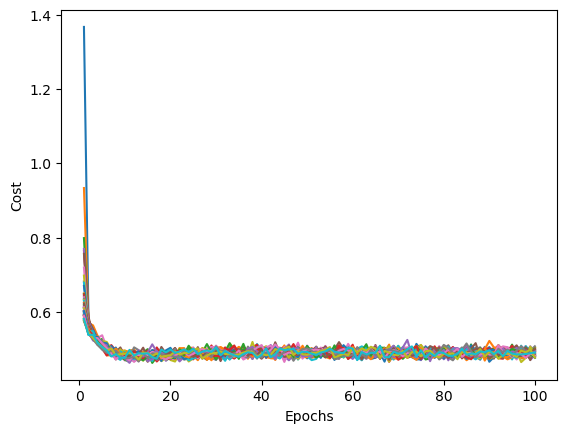

Accuracy: 0.6941694169416942


In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# define the TwoLayerPerceptron and TwoLayerPerceptronBase classes here

class NormalizedTwoLayerPerceptron(TLPVectorizedMiniBatchCrossEntropyGlorot):
    def fit(self, X, y, print_progress=False):
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        super().fit(X_norm, y, print_progress=print_progress)
        self.scaler_ = scaler
        
    def predict(self, X):
        X_norm = self.scaler_.transform(X)
        return super().predict(X_norm)

# train the model
params = { 'n_hidden':30, 
         'C':0.1, 'epochs':100, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = NormalizedTwoLayerPerceptron(n_hidden=30, C=0.0, epochs=500, eta=0.001, random_state=42)
model = NormalizedTwoLayerPerceptron(**params)
model.fit(X_train, y_train, print_progress=True)

# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


__TODO__ Compare the three models above, we just finshed one part. Next is three, four, five layer perceptrons and the grad stuff.